### ATP show length stats

Inspired by [this tweet](https://twitter.com/caseyliss/status/905639864087007232), I wanted to see how it ranked among other ATP episodes. Surprisingly, it is the fifth longest episode in the past 100 shows.


In [1]:
import time
from time import mktime
from datetime import datetime
import feedparser`
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def get_total_hours(dt):
    return (dt.hour*3600 + dt.minute*60 + dt.second)/3600.0

In [3]:
def parse_title(full_title):
    episode_num, title = full_title.split(':')
    title = title.strip()
    return int(episode_num), title

Unfortunately the RSS feed only has the last 100 episodes

In [4]:
atp_url = 'http://atp.fm/episodes?format=rss'
feed = feedparser.parse(atp_url)

In [5]:
pod_data = []
for x in feed['entries']:
    episode_num, title = parse_title(x['title'])
    pub_date = datetime.fromtimestamp(mktime(x['published_parsed'])).date()
    duration = datetime.strptime(x['itunes_duration'], '%H:%M:%S').time()
    duration_hours = get_total_hours(duration)
    
    pod_data.append((episode_num, title, duration, pub_date, duration_hours))

In [6]:
df = pd.DataFrame(pod_data, columns=['episode', 'title', 'duration', 'pub_date', 'duration_hours'])
df = df.sort_values(by='episode')
df = df.set_index('episode', drop=False)

In [26]:
min_time = df['duration'].min()
median_time = df['duration_hours'].median()
max_time = df['duration'].max()

In [64]:
median_time

1.9030555555555555

### Let's look at the shortest show

In [51]:
shortest_episode = df['duration_hours'].idxmin()
df[df['episode'] == shortest_episode]

,episode,title,duration,pub_date,duration_hours
episode,,,,,
176,176,Yellow Sock Time,01:23:17,2016-06-30,1.388056


### The longest show

In [52]:
longest_episode = df['duration_hours'].idxmax()
df[df['episode'] == longest_episode]

,episode,title,duration,pub_date,duration_hours
episode,,,,,
186,186,Jony Ive Has a Lot of White Pants,03:14:06,2016-09-08,3.235


In [62]:
ranked = df['duration_hours'].rank()

In [63]:
ranked.loc[238]

96.0

This means that episode 238 was the 5th longest show in the past 100 episodes. Let's take a look at all of the episodes together:

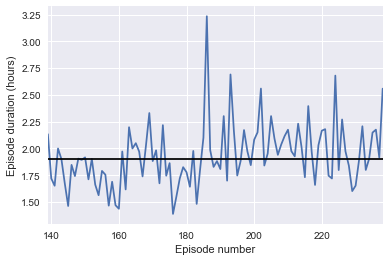

In [69]:
ax = df['duration_hours'].plot()
ax.axhline(y=median_time, c='black', )
ax.set_xlabel('Episode number')
ax.set_ylabel('Episode duration (hours)')
plt.savefig('atp_show.png', dpi=300)

The median show length (plotted in black is approximately ~1:54:00). The latest episode (238) does not look abnormally long, especially compared to recent episodes